In [1]:
from pathlib import Path
from omnibelt import toposort, load_json, save_json
from itertools import product, combinations
# import pyperclip
import random
from PIL import Image
from graphviz import Digraph
import matplotlib.pyplot as plt
import io
# import clipboard
import networkx as nx
from tqdm.notebook import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from omniply import tool, ToolKit, Context

import numpy as np
import torch
from causalbenchmark.novo.simulation.models import Bernoulli, ConditionalBernoulli, BernoulliNetwork
from causalbenchmark.novo.seeding import NewsHeadlines, StatisticsPrompting, Story
# from causalbenchmark.novo.seeding.prompting import GraphInfo
from causalbenchmark.novo.templating import FixedTemplate, SimpleTemplater
from causalbenchmark.novo import misc

In [2]:
spark_generator = NewsHeadlines(locs=['gb', 'de', 'fr', 'it', 'nl'], 
                                dataset_root=Path(r'/home/fleeb/workspace/local_data/nnn/babel-briefings-v1'),
                                # dataset_root=Path(r'C:\Users\anwan\workspace\local_data\nnn\babel-briefings-v1'),
                                ).load(pbar=tqdm)
len(spark_generator.article_IDs)

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
# ctx = Story(story_root=misc.data_root() / 'stories', story_id='test17')
ctx = Story(story_root=misc.data_root() / 'stories')
ctx.populate_defaults()
# ctx.populate_defaults(story_prompt_tempalte=setting_generation_prompt_template,
#                       graph_prompt_template=graph_selection_prompt_template,
#                       stats_prompt_template=stats_prompt_template,
#                         verb_prompt_template=verb_prompt_template,
#                         questions_prompt_template=question_prompt_template,
#                       )
ctx.include(spark_generator,)
# print(ctx)
# ctx['seed'] = 6660483#2494534#91220#1684065#6805333
print(ctx['seed'])
print(ctx['spark'])

6660483
Title: Naples, Apple renews the Academy program with the Federico II University - Rai News
Description: The academic training born between Cupertino and the University in 2016 restarts at the San Giovanni a Teduccio headquarters
Original Language: Italian


In [11]:
# if 'prompt_story' in ctx:
#     del ctx['prompt_story']
print(ctx['prompt_story'])

We are interested in building a causal model based on the explicit and implicit assumptions contained in the specified article and then using causal inference to evaluate the reasoning. Answer the following questions to design an interesting, simple, and most importantly realistic causal model from a news article.

To help understand the instructions here are some tips:
- all variables are always binary and (at least in principle) measurable, so when creating and selecting variables, make sure it is reasonable to treat them as binary
- whenever you propose a variable, make sure to define the meaning of each value it can take, and mention whether it is observable or not
- outcome variables are always observable
- treatment variables are always observable and intervenable, that means it must be possible to (at least in principle) change their value if desired
- confounder variables may or may not be observable, and should always have at least two causal children (for example, a treatment

In [12]:
# if 'prompt_graph' in ctx:
#     del ctx['prompt_graph']
print(ctx['prompt_graph'])

1. Select some combination of 3-5 of the suggested confounder, mediator, and collider variables, in addition to the treatment and outcome variables to construct a realistic and interesting causal graph. Important: Make sure the causal graph is a DAG and that no node has more than three parents!
2.  List all the edges in the causal graph, and make sure to mention which edges are observable and which are not.
3. Provide a python list called `nodes` of all the nodes in the proposed graph. For each node, provide the following information in the form of a python dict:
- `name`: the name of the variable
- `description`: a short description of the variable
- `type`: the type of the variable, which can be one of the following: `outcome`, `treatment`, `confounder`, `mediator`, `collider`
- `observed`: a boolean value indicating whether the variable is observable or not
- `values`: a python list of the descriptions of the values the variable can take (corresponding to the index)
- `parents`: a p

In [13]:
# nodes = ctx['nodes']
#################################################


# Defining the nodes and their attributes for the causal graph
nodes = [
    {
        "name": "ParticipationAppleAcademy",
        "description": "Participation in the Apple Academy Program",
        "type": "treatment",
        "observed": True,
        "values": ["Does not participate", "Participates"],
        "parents": ["LocalEconCond"]
    },
    {
        "name": "UnivIndustryCollab",
        "description": "University-Industry Collaboration",
        "type": "treatment",
        "observed": True,
        "values": ["No collaboration", "Active collaboration"],
        "parents": ["LocalEconCond"]
    },
    {
        "name": "EmploymentRateTech",
        "description": "Employment Rate in Technology Sector",
        "type": "outcome",
        "observed": True,
        "values": ["No increase in employment rate", "Increase in employment rate"],
        "parents": ["SkillDevelopment", "NetworkBuilding", "LocalEconCond"]
    },
    {
        "name": "LocalEconCond",
        "description": "Local Economic Conditions",
        "type": "confounder",
        "observed": True,
        "values": ["Weak local economy", "Strong local economy"],
        "parents": []
    },
    {
        "name": "SkillDevelopment",
        "description": "Skill Development in students",
        "type": "mediator",
        "observed": True,
        "values": ["Low skill development", "High skill development"],
        "parents": ["ParticipationAppleAcademy", "UnivIndustryCollab"]
    },
    {
        "name": "NetworkBuilding",
        "description": "Professional Network Building among students",
        "type": "mediator",
        "observed": True,
        "values": ["Weak professional network", "Strong professional network"],
        "parents": ["ParticipationAppleAcademy", "UnivIndustryCollab"]
    },
    {
        "name": "StudentMotivation",
        "description": "Student Motivation",
        "type": "collider",
        "observed": True,
        "values": ["Low motivation", "High motivation"],
        "parents": ["SkillDevelopment", "EmploymentRateTech"]
    }
]

nodes




#################################################
varparents = {node['name']: node['parents'] for node in nodes}
varorder = toposort(varparents)
nodes = sorted(nodes, key=lambda x: varorder.index(x['name']))
ctx['nodes'] = nodes

ValueError: Could not save to JPEG for display

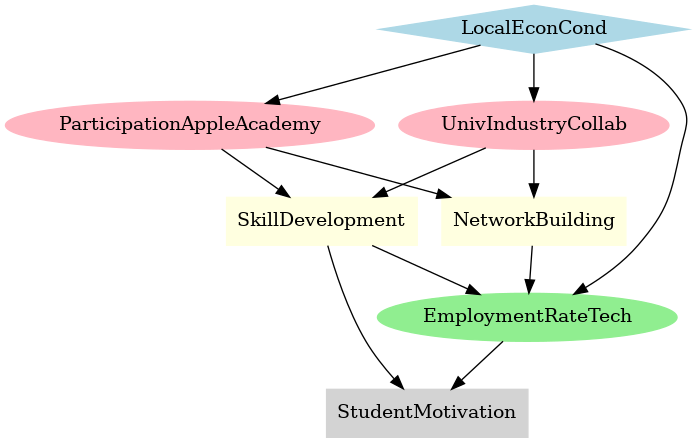

In [14]:
# G = ctx['graph']
# if 'graph' in ctx:
#     del ctx['graph']
# node_colors = {'treatment': 'lightcoral', 'outcome': 'lightgreen', 'confounder': 'lightblue', 'mediator': 'lightyellow', 'collider': 'lightgray'}
# colors = [node_colors[G.nodes[n]['type']] for n in G.nodes]
# plt.figure(figsize=(10, 6))
# pos = nx.circular_layout(G)
# nx.draw(G, pos, with_labels=True, node_color=colors, node_size=5000, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)
# plt.title('Causal Graph', size=15);
# plt.tight_layout();

dot = Digraph(comment='Causal Model')
node_styles = {
    "treatment": {"shape": "ellipse", "style": "filled", "color": "lightpink"},
    "outcome": {"shape": "ellipse", "style": "filled", "color": "lightgreen"},
    "confounder": {"shape": "diamond", "style": "filled", "color": "lightblue"},
    "mediator": {"shape": "box", "style": "filled", "color": "lightyellow"},
    "collider": {"shape": "box", "style": "filled", "color": "lightgray"}
}
for node in ctx['nodes']:
    style = node_styles.get(node["type"], {"shape": "ellipse"})
    dot.node(node["name"], node["name"], **style)
for node in ctx['nodes']:
    for parent in node["parents"]:
        dot.edge(parent, node["name"])
# dot.view()
dot.render(str(misc.temp_root() / 'graph'), format='png')
Image.open(misc.temp_root() / 'graph.png')

In [15]:
# if 'prompt_stats' in ctx:
#     del ctx['descriptions']
#     del ctx['prob_questions']
#     del ctx['prompt_stats']
print(ctx['prompt_stats'])

We have a causal bayes net based on the following article:

```
Title: Naples, Apple renews the Academy program with the Federico II University - Rai News
Description: The academic training born between Cupertino and the University in 2016 restarts at the San Giovanni a Teduccio headquarters
Original Language: Italian
```

Now we would like to estimate the probabilities of certain events.

Using commonsense, estimate the probabilities of the following events:

1. what is the probability that "LocalEconCond" is "Strong local economy" (rather than "Weak local economy")?
2. when "LocalEconCond" is "Weak local economy": what is the probability that "ParticipationAppleAcademy" is "Participates" (rather than "Does not participate")?
3. when "LocalEconCond" is "Strong local economy": what is the probability that "ParticipationAppleAcademy" is "Participates" (rather than "Does not participate")?
4. when "LocalEconCond" is "Weak local economy": what is the probability that "UnivIndustryCollab" 

In [16]:
# probabilities = ctx['stats']
#################################################


probabilities = {
    1: [0.4, 0.6], # Probability of a strong local economy
    2: [0.3, 0.5], # Weak economy, participation in Apple Academy
    3: [0.7, 0.9], # Strong economy, participation in Apple Academy
    4: [0.2, 0.4], # Weak economy, university-industry collaboration
    5: [0.6, 0.8], # Strong economy, university-industry collaboration
    6: [0.1, 0.3], # No participation/collaboration, high skill development
    7: [0.3, 0.5], # No participation, active collaboration, high skill development
    8: [0.5, 0.7], # Participation, no collaboration, high skill development
    9: [0.8, 0.9], # Participation and collaboration, high skill development
    10: [0.1, 0.3], # No participation/collaboration, strong network building
    11: [0.4, 0.6], # No participation, active collaboration, strong network
    12: [0.5, 0.7], # Participation, no collaboration, strong network
    13: [0.8, 0.9], # Participation and collaboration, strong network
    14: [0.1, 0.2], # Low skills/network, weak economy, increase in employment rate
    15: [0.2, 0.4], # Low skills/network, strong economy, increase in employment rate
    16: [0.3, 0.5], # Low skills, strong network, weak economy, increase in employment rate
    17: [0.4, 0.6], # Low skills, strong network, strong economy, increase in employment rate
    18: [0.4, 0.6], # High skills, weak network, weak economy, increase in employment rate
    19: [0.6, 0.8], # High skills, weak network, strong economy, increase in employment rate
    20: [0.6, 0.8], # High skills, strong network, weak economy, increase in employment rate
    21: [0.8, 0.9], # High skills, strong network, strong economy, increase in employment rate
    22: [0.2, 0.4], # Low skills, no increase in employment rate, high motivation
    23: [0.3, 0.5], # Low skills, increase in employment rate, high motivation
    24: [0.5, 0.7], # High skills, no increase in employment rate, high motivation
    25: [0.7, 0.9]  # High skills, increase in employment rate, high motivation
}



#################################################
ctx['stats'] = probabilities

In [17]:
raw_prob_samples = []
def to_prob_range(raw):
    raw = [prange for _, prange in sorted(raw.items(), key=lambda item: int(item[0]))]
    return torch.tensor(raw)

prob_ranges = to_prob_range(ctx['stats'])
lower_bound, upper_bound = prob_ranges.t()

variables = {}
for node in ctx['nodes']:
    if len(node['parents']):
        variables[node['name']] = ConditionalBernoulli([variables[parent] for parent in node['parents']])
    else:
        variables[node['name']] = Bernoulli(0.5)
net = BernoulliNetwork(variables)
def mc_samples(N, *fns):
    estimates = []
    for _ in tqdm(range(N)):
        param_sample = torch.rand(len(prob_ranges), 1) * (upper_bound - lower_bound) + lower_bound
        net.set_params(param_sample)
        estimates.append([fn() for fn in fns])
    return torch.tensor(estimates)
def make_ate_fn(treatment, outcome, conditions=None):
    def ate_fn():
        return net.ate(treatment, conditions=conditions)[outcome].item()
    return ate_fn
def make_corr_fn(v1, v2):
    def corr_fn():
        return net.correlation(v1, v2).item()
    return corr_fn
treatment1, treatment2 = [n for n in ctx['treatments']]
# t1vals = [node['values'] for node in ctx['nodes'] if node['name'] == treatment1][0]
# t2vals = [node['values'] for node in ctx['nodes'] if node['name'] == treatment2][0]
outcome = ctx['outcome']#['name']
# ovals = [node['values'] for node in ctx['nodes'] if node['name'] == outcome][0]
confounders = [node for node in ctx['confounders']]

print(tabulate([
    [treatment1['name'], *treatment1['values'], treatment1['description']],
    [treatment2['name'], *treatment2['values'], treatment2['description']],
    [outcome['name'], *outcome['values'], outcome['description']],
]))

cate_keys = [(treatment, confounder, cval) for treatment in ctx['treatments'] for confounder in ctx['confounders'] for cval in [0, 1]]
cate_fns = [make_ate_fn(treatment['name'], outcome['name'], conditions={confounder['name']: val}) for treatment, confounder, val in cate_keys]
ate1, ate2, corr1, corr2, *cates = mc_samples(50, make_ate_fn(treatment1['name'], outcome['name']), make_ate_fn(treatment2['name'], outcome['name']),
                                      make_corr_fn(treatment1['name'], outcome['name']), make_corr_fn(treatment2['name'], outcome['name']), *cate_fns).t()

print('\n'.join(f'{node["name"]!r} means {node["description"]}' for node in ctx['nodes']))
print(tabulate([
    [f'{treatment1["values"][1]}', f'{treatment1["name"]}', f'{outcome["values"][1]}', f'{outcome["name"]}', ate1.mean(), corr1.mean(), ],
    [f'{treatment2["values"][1]}', f'{treatment2["name"]}', f'{outcome["values"][1]}', f'{outcome["name"]}', ate2.mean(), corr2.mean(), ],
], headers=['Treatment Value', 'Treatment', 'Outcome Value', 'Outcome', 'ATE', 'Correlation']))

-------------------------  ------------------------------  ---------------------------  ------------------------------------------
ParticipationAppleAcademy  Does not participate            Participates                 Participation in the Apple Academy Program
UnivIndustryCollab         No collaboration                Active collaboration         University-Industry Collaboration
EmploymentRateTech         No increase in employment rate  Increase in employment rate  Employment Rate in Technology Sector
-------------------------  ------------------------------  ---------------------------  ------------------------------------------


  0%|          | 0/50 [00:00<?, ?it/s]

/home/fleeb/miniconda3/lib/python3.11/site-packages/torch/masked/maskedtensor/core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "


'LocalEconCond' means Local Economic Conditions
'ParticipationAppleAcademy' means Participation in the Apple Academy Program
'UnivIndustryCollab' means University-Industry Collaboration
'SkillDevelopment' means Skill Development in students
'NetworkBuilding' means Professional Network Building among students
'EmploymentRateTech' means Employment Rate in Technology Sector
'StudentMotivation' means Student Motivation
Treatment Value       Treatment                  Outcome Value                Outcome                  ATE    Correlation
--------------------  -------------------------  ---------------------------  ------------------  --------  -------------
Participates          ParticipationAppleAcademy  Increase in employment rate  EmploymentRateTech  0.220944    -0.0168575
Active collaboration  UnivIndustryCollab         Increase in employment rate  EmploymentRateTech  0.132681    -0.00136047


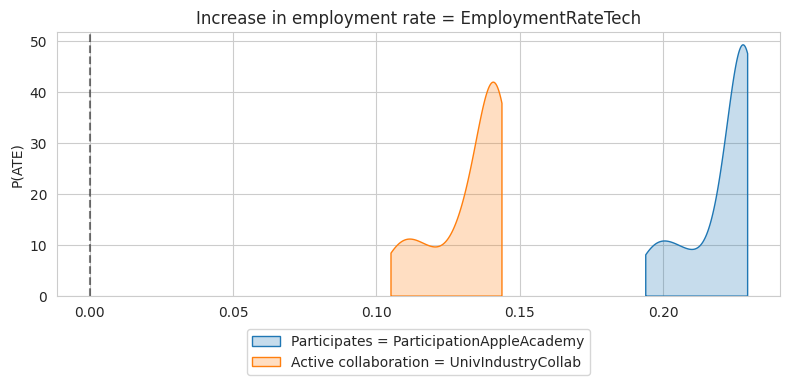

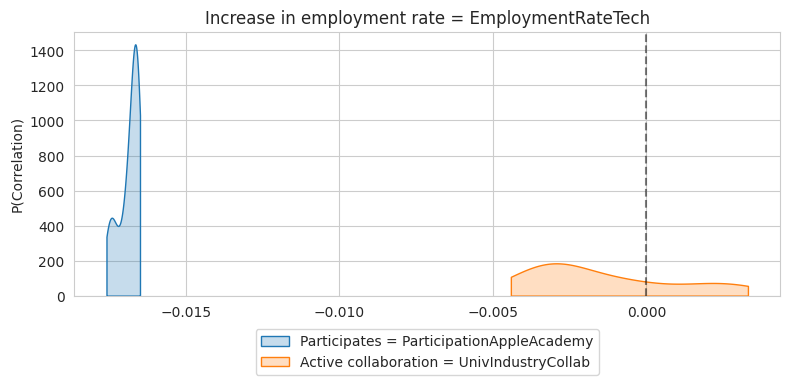

In [18]:
plt.figure(figsize=(8, 4))
sns.kdeplot(ate1, label=f'{treatment1["values"][1]} = {treatment1["name"]}', fill=True, clip=(min(ate1), max(ate1)));
sns.kdeplot(ate2, label=f'{treatment2["values"][1]} = {treatment2["name"]}', fill=True, clip=(min(ate2), max(ate2)));
plt.title(f'{outcome["values"][1]} = {outcome["name"]}')
plt.ylabel(f'P(ATE)')
plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -.1))
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
# plt.xlim(-1, 1)
plt.tight_layout();

plt.figure(figsize=(8, 4))
sns.kdeplot(corr1, label=f'{treatment1["values"][1]} = {treatment1["name"]}', fill=True, clip=(min(corr1), max(corr1)));
sns.kdeplot(corr2, label=f'{treatment2["values"][1]} = {treatment2["name"]}', fill=True, clip=(min(corr2), max(corr2)));
plt.title(f'{outcome["values"][1]} = {outcome["name"]}')
plt.ylabel(f'P(Correlation)')
plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -.1))
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
# plt.xlim(-1, 1)
plt.tight_layout();

In [19]:
mn1, mx1 = ate1.min().item(), ate1.max().item()
mu1 = ate1.mean().item()
assert mn1 * mx1 > 0, f'{mn1} * {mx1} < 0'
mn2, mx2 = ate2.min().item(), ate2.max().item()
mu2 = ate2.mean().item()
assert mn2 * mx2 > 0, f'{mn2} * {mx2} < 0'
ctx['ate1'] = ate1.mean().item()
ctx['ate2'] = ate2.mean().item()
reverse1 = mu1 < 0
reverse2 = mu2 < 0
# print(tabulate([(node['name'], *node['values'], node['description']) for node in ctx['nodes']], headers=['Variable Name', 'Value 0', 'Value 1', 'Description']))
# outcome = [node['name'] for node in ctx['nodes'] if node['type'] == 'outcome'][0]
tbl = []

for node1, node2 in product(ctx['nodes'], ctx['nodes']):
    if node1 != node2:
        tbl.append([
                    f'{node1["values"][1]} {node1["name"]}', 
                    f"{net.ate(node1['name'])[node2['name']].item():.2f}", 
                    f"{net.correlation(node1['name'], node2['name']).item():.2f}",
                    f'{node2["values"][1]} {node2["name"]}', 
                    # node1['description'], 
                    # node2['description'], 
                    ])
print(tabulate(tbl, headers=['Treatment', 'ATE', 'Correlation', 'Outcome', 
                             # 'Treatment Description', 'Outcome Description'
                             ]))

/home/fleeb/miniconda3/lib/python3.11/site-packages/torch/masked/maskedtensor/core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "


Treatment                                         ATE    Correlation  Outcome
----------------------------------------------  -----  -------------  ----------------------------------------------
Strong local economy LocalEconCond               0.4            0.16  Participates ParticipationAppleAcademy
Strong local economy LocalEconCond               0.4            0.01  Active collaboration UnivIndustryCollab
Strong local economy LocalEconCond               0.25           0.02  High skill development SkillDevelopment
Strong local economy LocalEconCond               0.24          -0.03  Strong professional network NetworkBuilding
Strong local economy LocalEconCond               0.26           0.02  Increase in employment rate EmploymentRateTech
Strong local economy LocalEconCond               0.13           0     High motivation StudentMotivation
Participates ParticipationAppleAcademy           0              0.16  Strong local economy LocalEconCond
Participates ParticipationAppleAcade

In [20]:
print(net.backdoor_estimand(treatment1['name'], outcome['name']))
print(net.backdoor_estimand(treatment2['name'], outcome['name']))

('ParticipationAppleAcademy', 'EmploymentRateTech', ['LocalEconCond'])
('UnivIndustryCollab', 'EmploymentRateTech', ['LocalEconCond'])


In [21]:
# if 'prompt_verbs' in ctx:
#     del ctx['prompt_verbs']
print(ctx['prompt_verbs'])

We would like to find very natural verbalizations of the following binary variables selected from a statistical model. The verbalizations should sound more natural and organic, so that you could imagine them being used in a news paper article or casual conversation, while still being semantically equivalent to the original variable and value.

Here are the templates that we use to verbalize the variables:

1. One of the variables is {variable}.
2. We estimate {subject} [often/usually/sometimes/rarely/etc.] {value}.
3. There is a [number]% chance that {value}.
4. [number]% of {domain} {value}.
5. [number]% of the time {value}.
6. Conditional sentence: {value}, [some consequence].
7. Interventional: If {value}, [some effect].

Variable 'LocalEconCond' (0='Weak local economy', 1='Strong local economy') means Local Economic Conditions
Variable 'ParticipationAppleAcademy' (0='Does not participate', 1='Participates') means Participation in the Apple Academy Program
Variable 'UnivIndustryColl

In [23]:
# verbalizations = ctx['verbs']
#######################################################################

verbalizations = {
    "LocalEconCond": {
        1: {"variable": ["the local economic strength", "the robustness of the local economy"]},
        2: {"subject": "the area", "value": {0: ["experiences a struggling economy", "is facing economic difficulties"], 1: ["enjoys a thriving economy", "benefits from a strong economy"]}},
        3: {"value": {0: ["the economy is struggling", "economic challenges are prevalent"], 1: ["the economy is robust", "there's economic prosperity"]}},
        4: {"domain": "regions", "value": {0: ["are economically struggling", "face economic challenges"], 1: ["are economically strong", "exhibit economic prosperity"]}},
        5: {"value": {0: ["the economy falters", "economic downturns are seen"], 1: ["the economy flourishes", "economic growth is evident"]}},
        6: {"value": {0: ["In regions with a weak economy", "Where the economy is struggling"], 1: ["In areas with a strong economy", "Where the economy is flourishing"]}},
        7: {"value": {0: ["if the local economy weakens", "if economic conditions deteriorate"], 1: ["if the local economy strengthens", "if economic conditions improve"]}},
    },
    "ParticipationAppleAcademy": {
        1: {"variable": ["participation in the Apple Academy", "involvement in the Apple Academy program"]},
        2: {"subject": "students", "value": {0: ["are not involved in the Apple Academy", "do not participate in the Apple Academy"], 1: ["take part in the Apple Academy", "are enrolled in the Apple Academy program"]}},
        3: {"value": {0: ["students are not participating in the Apple Academy", "there is no student involvement in the Apple Academy"], 1: ["students are participating in the Apple Academy", "there is active student involvement in the Apple Academy"]}},
        4: {"domain": "students", "value": {0: ["do not participate in the Apple Academy", "are not enrolled in the Apple Academy program"], 1: ["participate in the Apple Academy", "are enrolled in the Apple Academy program"]}},
        5: {"value": {0: ["participation in the Apple Academy is absent", "no students are involved in the Apple Academy"], 1: ["participation in the Apple Academy is high", "many students are involved in the Apple Academy"]}},
        6: {"value": {0: ["If students do not participate in the Apple Academy", "When students are not involved in the Apple Academy program"], 1: ["If students participate in the Apple Academy", "When students are involved in the Apple Academy program"]}},
        7: {"value": {0: ["if students do not join the Apple Academy", "if there's no student involvement in the Apple Academy"], 1: ["if students enroll in the Apple Academy", "if student participation in the Apple Academy occurs"]}},
    },
    "UnivIndustryCollab": {
        1: {"variable": ["university-industry collaboration", "partnership between universities and industry"]},
        2: {"subject": "universities", "value": {0: ["do not collaborate with industry", "lack industry partnerships"], 1: ["collaborate with industry", "forge partnerships with industry"]}},
        3: {"value": {0: ["there is no collaboration between universities and industry", "partnerships between academia and industry are absent"], 1: ["collaboration between universities and industry is active", "partnerships between academia and industry exist"]}},
        4: {"domain": "institutions", "value": {0: ["do not engage in industry collaboration", "have no industry partnerships"], 1: ["engage in industry collaboration", "have active industry partnerships"]}},
        5: {"value": {0: ["university-industry collaboration is missing", "there are no academic-industrial partnerships"], 1: ["university-industry collaboration is evident", "academic-industrial partnerships are in place"]}},
        6: {"value": {0: ["When there is no collaboration between universities and industries", "In the absence of academic-industrial partnerships"], 1: ["When universities and industries collaborate", "When academic-industrial partnerships are formed"]}},
        7: {"value": {0: ["if universities do not collaborate with industries", "if academic-industrial partnerships are not established"], 1: ["if universities collaborate with industries", "if academic-industrial partnerships are established"]}},
    },
    "SkillDevelopment": {
        1: {"variable": ["level of skill development", "advancement in skills among students"]},
        2: {"subject": "students", "value": {0: ["have low skill development", "show limited skill advancement"], 1: ["have high skill development", "show significant skill advancement"]}},
        3: {"value": {0: ["skills are poorly developed among students", "there is minimal skill advancement in students"], 1: ["students exhibit high skill development", "there is significant skill advancement among students"]}},
        4: {"domain": "students", "value": {0: ["have underdeveloped skills", "show little skill improvement"], 1: ["have highly developed skills", "show significant skill improvement"]}},
        5: {"value": {0: ["skill development is minimal", "skill advancement is limited"], 1: ["skill development is substantial", "skill advancement is significant"]}},
        6: {"value": {0: ["When students have low skill development", "If students show limited skill improvement"], 1: ["When students achieve high skill development", "If students demonstrate significant skill advancement"]}},
        7: {"value": {0: ["if student skill development is low", "if there's minimal skill improvement in students"], 1: ["if student skill development is high", "if there's significant skill advancement among students"]}},
    },
    "NetworkBuilding": {
        1: {"variable": ["network building among students", "development of professional networks by students"]},
        2: {"subject": "students", "value": {0: ["have weak professional networks", "struggle with network building"], 1: ["build strong professional networks", "excel in network building"]}},
        3: {"value": {0: ["students have weak professional networks", "there is limited networking among students"], 1: ["students build strong professional networks", "effective networking is prevalent among students"]}},
        4: {"domain": "students", "value": {0: ["lack strong professional networks", "are not effective at networking"], 1: ["have strong professional networks", "are effective at networking"]}},
        5: {"value": {0: ["network building is weak among students", "professional networking is not emphasized"], 1: ["strong network building is evident", "professional networking is a focus"]}},
        6: {"value": {0: ["When students have weak professional networks", "If networking among students is limited"], 1: ["When students build strong professional networks", "If there is effective networking among students"]}},
        7: {"value": {0: ["if students fail to build strong networks", "if networking efforts among students are weak"], 1: ["if students build strong professional networks", "if there is a focus on effective networking among students"]}},
    },
    "EmploymentRateTech": {
        1: {"variable": ["employment rate in the tech sector", "job growth in technology"]},
        2: {"subject": "the technology sector", "value": {0: ["sees no increase in employment rates", "experiences stagnation in job growth"], 1: ["experiences an increase in employment rates", "sees a surge in job growth"]}},
        3: {"value": {0: ["there is no increase in employment rates in tech", "job growth in technology is stagnant"], 1: ["employment rates in tech are on the rise", "there is significant job growth in technology"]}},
        4: {"domain": "companies", "value": {0: ["do not see an increase in employment rates", "experience stagnation in hiring"], 1: ["experience an increase in employment rates", "see a boost in hiring"]}},
        5: {"value": {0: ["employment rates in tech do not increase", "there's no growth in tech sector jobs"], 1: ["employment rates in tech rise", "tech sector jobs grow"]}},
        6: {"value": {0: ["When the tech sector doesn't see an increase in employment rates", "If there's no job growth in technology"], 1: ["When the tech sector experiences a rise in employment rates", "If there's significant job growth in technology"]}},
        7: {"value": {0: ["if employment rates in tech do not improve", "if there's no growth in tech sector jobs"], 1: ["if the tech sector sees a rise in employment rates", "if there's a surge in tech job growth"]}},
    },    
    "StudentMotivation": {
        1: {"variable": ["student motivation levels", "the degree of student enthusiasm"]},
        2: {"subject": "students", "value": {0: ["lack motivation", "show little interest in their studies"], 1: ["are highly motivated", "show great enthusiasm for their studies"]}},
        3: {"value": {0: ["students are not very motivated", "there is a lack of enthusiasm among students"], 1: ["students are highly motivated", "there is a strong sense of enthusiasm among students"]}},
        4: {"domain": "students", "value": {0: ["lack motivation", "are not particularly enthusiastic"], 1: ["are highly motivated", "are very enthusiastic"]}},
        5: {"value": {0: ["motivation among students is low", "students exhibit low levels of enthusiasm"], 1: ["motivation among students is high", "students exhibit high levels of enthusiasm"]}},
        6: {"value": {0: ["When students lack motivation", "If students show little interest"], 1: ["When students are highly motivated", "If students are very enthusiastic"]}},
        7: {"value": {0: ["if students lack motivation", "if there is a decrease in student enthusiasm"], 1: ["if students are highly motivated", "if there is an increase in student enthusiasm"]}},
    },
}


#######################################################################
ctx['verbs'] = verbalizations

In [24]:
# if 'prompt_questions' in ctx:
#     del ctx['prompt_questions']
print(ctx['prompt_questions'])

We have a causal bayes net based on the following article:

```
Title: Naples, Apple renews the Academy program with the Federico II University - Rai News
Description: The academic training born between Cupertino and the University in 2016 restarts at the San Giovanni a Teduccio headquarters
Original Language: Italian
```

Now we would like to use this model to generate some interesting research questions:

1. Write a short two sentence introduction to describe motivation and purpose of the causal model to provide context to the questions in an conversational/debate setting. Where possible, include relevant details from the original article headline or related information you can infer therefrom. Avoid discussing specific structural properties or assumptions in the causal graph, and instead focus on the overall motivation and potential applications for the model. Refrain from mentioning words like "causal inference" or "model".
Make sure not to use any technical terms from causal infer

In [25]:
# setting = ctx['questions']
#######################################################################


setting = {
  "introduction": "In light of the recent collaboration between Apple and the Federico II University in Naples, there's growing interest in understanding how such academic programs and industry partnerships impact the local economy and education sector. This analysis aims to explore the dynamics between educational initiatives, economic conditions, and their effects on student outcomes and local employment opportunities.",
  "overview": "Our discussion revolves around how different factors like participation in Apple's academic program and collaborations between universities and industry players can influence key areas such as student skill development, professional networking, and the job market in the tech sector. We're particularly interested in understanding how these factors interact with the local economic environment and what this means for students and the community.",
  "questions": {
    1: {"question": "Is joining the Apple Academy program likely to reduce the employment opportunities in the tech sector?", "answer": "no", "explanation": "Joining the Apple Academy program is expected to enhance employment opportunities in the tech sector by providing relevant skills and knowledge.", "wrong_explanation": "Joining the Apple Academy program is likely to reduce employment opportunities in the tech sector due to a saturated job market."},
    2: {"question": "Does active collaboration between universities and the tech industry lead to increased employment in the tech sector?", "answer": "yes", "explanation": "Active collaboration between universities and the tech industry typically fosters a conducive environment for job creation and skill application in the tech sector.", "wrong_explanation": "Active collaboration between universities and the tech industry might overcrowd the sector, leading to fewer job opportunities."},
    3: {"question": "Is participating in the Apple Academy program more influential in increasing tech sector employment than active university-industry collaboration?", "answer": "no", "explanation": "Active university-industry collaboration tends to have a more significant impact on employment in the tech sector compared to individual participation in programs like Apple Academy.", "wrong_explanation": "Participation in the Apple Academy program is more effective in increasing employment in the tech sector compared to university-industry collaboration."},
    4: {"question": "Is the impact of university-industry collaboration on tech employment stronger than that of participating in the Apple Academy program?", "answer": "yes", "explanation": "University-industry collaboration usually has a stronger and broader impact on technology sector employment compared to the more individual-focused influence of participating in the Apple Academy program.", "wrong_explanation": "The individual-focused nature of the Apple Academy program has a stronger impact on technology sector employment compared to broader university-industry collaborations."},
    5: {"question": "In regions with a weak local economy, does participation in the Apple Academy program positively influence tech sector employment?", "answer": "yes", "explanation": "In areas with weaker economies, programs like the Apple Academy can provide crucial skills and opportunities, thus positively impacting tech sector employment.", "wrong_explanation": "In regions with a weak economy, participation in the Apple Academy program is likely ineffective and does not boost employment in the tech sector."},
    6: {"question": "In a weak economic setting, does collaboration between universities and the tech industry enhance job opportunities in the tech sector?", "answer": "yes", "explanation": "Even in economically weaker areas, collaboration between universities and industry can stimulate the tech job market by bridging academic knowledge and practical industry needs.", "wrong_explanation": "In a weak economic setting, university-industry collaboration might not be sufficient to significantly improve employment opportunities in the tech sector."},
    7: {"question": "In regions with a struggling economy, does university-industry collaboration have a greater impact on tech sector employment than participation in the Apple Academy program?", "answer": "yes", "explanation": "In challenging economic conditions, the broader impact of university-industry collaboration tends to be more significant for tech sector employment compared to the more focused approach of the Apple Academy program.", "wrong_explanation": "In a struggling economy, the focused approach of the Apple Academy program is more beneficial for tech sector employment than broader university-industry collaborations."},
    8: {"question": "Does participation in the Apple Academy program have a more substantial effect on employment in the tech sector than university-industry collaboration in areas with weak economies?", "answer": "no", "explanation": "In weaker economic areas, the broader approach of university-industry collaboration is generally more impactful on tech sector employment than the more targeted impact of the Apple Academy program.", "wrong_explanation": "In areas with weaker economies, the Apple Academy program tends to have a more significant effect on tech sector employment than university-industry collaboration."},
    9: {"question": "In regions with a strong local economy, does participation in the Apple Academy program improve employment opportunities in the tech sector?", "answer": "yes", "explanation": "In areas with robust economies, the Apple Academy program can complement existing opportunities, further boosting employment in the tech sector.", "wrong_explanation": "In economically stronger regions, the Apple Academy program may not significantly contribute to improving employment opportunities in the tech sector."},
    10: {"question": "In a strong economic environment, does collaboration between universities and the tech industry reduce employment in the tech sector?", "answer": "no", "explanation": "In a strong economy, university-industry collaboration typically contributes positively to the tech sector's employment landscape, rather than reducing job opportunities.", "wrong_explanation": "In a strong economic setting, university-industry collaboration can saturate the market, leading to a reduction in tech sector employment opportunities."},
    11: {"question": "In a strong economy, is the impact of university-industry collaboration on tech sector employment less than that of participating in the Apple Academy program?", "answer": "no", "explanation": "In a thriving economy, the broader impact of university-industry collaboration often surpasses the effect of individual programs like the Apple Academy on tech sector employment.", "wrong_explanation": "In a strong economy, the focused nature of the Apple Academy program tends to be more effective in boosting tech sector employment than university-industry collaboration."},
    12: {"question": "Does university-industry collaboration have a greater overall impact on tech sector employment than the Apple Academy program in regions with a strong economy?", "answer": "yes", "explanation": "In economically stronger regions, university-industry collaboration often has a more substantial and wide-reaching impact on tech sector employment compared to the Apple Academy program.", "wrong_explanation": "In stronger economic regions, the Apple Academy program often has a more significant impact on tech sector employment than university-industry collaboration."},
    13: {"question": "Does participation in the Apple Academy program have a more positive impact on tech sector employment in regions with a strong economy than in those with a weak economy?", "answer": "yes", "explanation": "The impact of the Apple Academy program on tech sector employment is often more pronounced in regions with strong economies, where it can add to existing growth dynamics.", "wrong_explanation": "The Apple Academy program tends to have a greater impact on tech sector employment in regions with weaker economies, where it fills a crucial gap in skills and opportunities."},
    14: {"question": "Is the positive effect of the Apple Academy program on tech sector employment more significant in areas with a strong economy compared to those with a weak economy?", "answer": "yes", "explanation": "In areas with strong economies, the Apple Academy program can significantly amplify the existing positive dynamics in tech sector employment.", "wrong_explanation": "In areas with weak economies, the Apple Academy program tends to have a more substantial positive effect on tech sector employment than in stronger economic regions."},
    15: {"question": "Is the impact of university-industry collaboration on tech sector employment less in a strong economy compared to a weak economy?", "answer": "no", "explanation": "University-industry collaboration often has a consistently positive impact on tech sector employment, regardless of the underlying economic strength of the region.", "wrong_explanation": "University-industry collaboration is more impactful in enhancing tech sector employment in weaker economies compared to stronger ones."},
    16: {"question": "Does university-industry collaboration have a stronger impact on tech sector employment in regions with a weak economy than in those with a strong economy?", "answer": "no", "explanation": "University-industry collaboration typically contributes positively to tech sector employment in both strong and weak economic settings, without a significant difference in impact based on economic strength.", "wrong_explanation": "University-industry collaboration has a more pronounced impact on tech sector employment in regions with weak economies, where it can fill larger gaps in the job market."}
  },
}



#######################################################################
ctx['questions'] = setting

In [26]:
i = len(list(ctx._root.glob("*.json")))+1
path = ctx._root / f'test{i}'
while path.exists():
    i += 1
    path = ctx._root / f'test{i}'
ctx.save(path.stem if ctx.story_id is None else ctx.story_id)

PosixPath('/home/fleeb/workspace/code/cladder/novo-data/stories/test21.json')

In [27]:
ctx['stats'] = {int(k): v for k, v in ctx['stats'].items()}
ctx['verbs'] = {k: {int(k2): v2 for k2, v2 in v.items()} for k, v in ctx['verbs'].items()}
for k, v in ctx['verbs'].items():
    for k2, v2 in v.items():
        if 'value' in v2:
            v2['value'] = {int(k3): v3 for k3, v3 in v2['value'].items()}
ctx['questions']['questions'] = {int(k): v for k, v in ctx['questions']['questions'].items()}

In [28]:
rawverbs = ctx['verbs']
rawvars = {node['name']: node for node in ctx['nodes']}

In [29]:
print(net.backdoor_estimand(treatment1['name'], outcome['name']))
print(net.backdoor_estimand(treatment2['name'], outcome['name']))

('ParticipationAppleAcademy', 'EmploymentRateTech', ['LocalEconCond'])
('UnivIndustryCollab', 'EmploymentRateTech', ['LocalEconCond'])


In [30]:
qkey = random.choice(list(ctx['questions']['questions']))
qkey = 3
qinfo = ctx['questions']['questions'][qkey]
query = ctx['queries'][qkey-1]
print(ctx['query_description'].split('\n')[qkey-1])
print(query)
qinfo

	3. ATE('ParticipationAppleAcademy') < ATE('UnivIndustryCollab')
{'treatment1': 'ParticipationAppleAcademy', 'treatment2': 'UnivIndustryCollab', 'query': 'ate', 'type': 'ate-compare', 'criterion': '<'}


{'question': 'Is participating in the Apple Academy program more influential in increasing tech sector employment than active university-industry collaboration?',
 'answer': 'no',
 'explanation': 'Active university-industry collaboration tends to have a more significant impact on employment in the tech sector compared to individual participation in programs like Apple Academy.',
 'wrong_explanation': 'Participation in the Apple Academy program is more effective in increasing employment in the tech sector compared to university-industry collaboration.'}

In [ ]:
# 1. One of the variables is {variable}.
# 2. We estimate {subject} [often/usually/sometimes/rarely/etc.] {value}.
# 3. There is a [number]% chance that {value}.
# 4. [number]% of {domain} {value}.
# 5. [number]% of the time {value}.
# 6. Conditional sentence: {value}, [some consequence].
# 7. Interventional: If {value}, [some effect].

In [63]:
next(iter(rawverbs.values()))

{1: {'variable': ['the age of the refinery',
   'how long the refinery has been operational']},
 2: {'subject': 'the refinery',
  'value': {0: ['is a new facility', 'has been recently established'],
   1: ['has been operating for many years', 'is an older establishment']}},
 3: {'value': {0: ['the refinery is newly built',
    'the refinery has been recently established'],
   1: ['the refinery is quite old',
    'the refinery has many years of operation']}},
 4: {'domain': 'refineries',
  'value': {0: ['are new establishments', 'have been recently built'],
   1: ['are older facilities', 'have been operating for many years']}},
 5: {'value': {0: ['the refinery is a new establishment',
    'the refinery has been recently constructed'],
   1: ['the refinery is an old establishment',
    'the refinery has been operating for a long time']}},
 6: {'value': {0: ['If the refinery is newly established',
    'In newer refineries'],
   1: ['If the refinery has been around for many years',
    'In

In [ ]:
varverbs = {}

for var, raw in rawverbs.items():
    info = {'values': {0: {}, 1: {}}}
    info0 = info['values'][0]
    info1 = info['values'][1]
    
    info['variable'] = raw[1]['variable']
    info['subject'] = raw[2]['subject']
    info['domain'] = raw[3]['domain']
    
    
    
    for i in [0, 1]:
        info_val = raw[2]['value'][i]
        info_val['verb'] = raw[2]['value'][i]
        

    varverbs[var] = info

In [62]:
rawverbs[treatment1['name']]

{1: {'variable': ['the safety protocols in place at the refinery',
   'how well the refinery follows safety guidelines']},
 2: {'subject': 'the refinery',
  'value': {0: ['lacks adequate safety protocols',
    'has insufficient safety measures'],
   1: ['maintains adequate safety protocols', 'has robust safety measures']}},
 3: {'value': {0: ['safety protocols are inadequate',
    'safety measures are not up to standard'],
   1: ['safety protocols are thoroughly implemented',
    'safety measures are comprehensive']}},
 4: {'domain': 'refineries',
  'value': {0: ['lack adequate safety measures',
    'do not follow safety guidelines properly'],
   1: ['have robust safety protocols',
    'adhere strictly to safety guidelines']}},
 5: {'value': {0: ['safety protocols are not followed properly',
    'safety measures are neglected'],
   1: ['safety protocols are strictly followed',
    'safety measures are taken seriously']}},
 6: {'value': {0: ['If safety protocols are lacking',
    'In re

In [28]:
rawverbs[outcome['name']]

{'1': {'variable': ['public support for the climate bill',
   "the climate bill's popularity"]},
 '2': {'subject': 'the climate bill',
  'value': {'0': ['lacks public support', 'is unpopular among the public'],
   '1': ['enjoys high public support', 'is popular among the public']}},
 '3': {'value': {'0': ['there is little public backing for the climate bill',
    'the climate bill is not popular'],
   '1': ['there is strong public support for the climate bill',
    'the climate bill is popular']}},
 '4': {'domain': 'public opinions',
  'value': {'0': ['do not favor the climate bill',
    'show disapproval of the climate bill'],
   '1': ['favor the climate bill', 'show approval of the climate bill']}},
 '5': {'value': {'0': ['the climate bill struggles to gain public support',
    'the climate bill faces public disapproval'],
   '1': ['the climate bill wins public support',
    'the climate bill is well-received by the public']}},
 '6': {'value': {'0': ['If public support for the climat

In [ ]:
example_tmpl = '{subject} often {value}.'

In [35]:
rawverbs

{'Presidential Engagement in Climate Discussions': {'1': {'variable': ['presidential involvement in climate talks',
    "the president's active participation in climate discussions"]},
  '2': {'subject': 'the president',
   'value': {'0': ['is not involved in climate discussions',
     'does not engage in climate talks'],
    '1': ['actively participates in climate discussions',
     'is deeply involved in climate talks']}},
  '3': {'value': {'0': ['the president is not engaged in climate talks',
     'there is no presidential involvement in climate discussions'],
    '1': ['the president is actively engaged in climate talks',
     'there is direct presidential involvement in climate discussions']}},
  '4': {'domain': 'instances of climate discussions',
   'value': {'0': ['do not include presidential engagement',
     "lack the president's involvement"],
    '1': ['include active presidential participation',
     "feature the president's active involvement"]}},
  '5': {'value': {'0': [

In [ ]:
ctx.include(get_verbalization_info);
verb_prompt_template = '''We would like to find very natural verbalizations of the following binary variables selected from a statistical model. The verbalizations should sound more natural and organic, so that you could imagine them being used in a news paper article or casual conversation, while still being semantically equivalent to the original variable and value.

Here are the templates that we use to verbalize the variables:

1. {{subject}} [often/usually/sometimes/rarely/etc.] {{value}}.
2. There is a [number]% chance that {{value}}.
3. [number]% of {{domain}} {{value}}.
4. [number]% of the time {{value}}.
5. Conditional sentence: {{value}}, [some consequence].
6. Interventional: If {{value}}, [some effect].

{variable_description}

Here are some examples of verbalizations of the variable. For each of the templates fill in the blanks (and include 2-3 examples for each template). Format your response as a python dictionary. For example, a variable "Smoking Rate" which takes the values "Low Smoking Rate" and "High Smoking Rate" can be verbalized like this:

```python
verbalizations = {{
  "Smoking Rate": {{
    "Low Smoking Rate": {{
      1: {{"subject": "people", "value": ["do not smoke", "are non-smokers"]}},
      2: {{"value": ["a person does not smoke", "people are non-smokers"]}}, 
      3: {{"domain": "people", "value": ["do not smoke", "are non-smokers"]}}, 
      4: {{"value": ["people do not smoke", "people are non-smokers"]}},
      5: {{"value": ["For people that do not smoke", "Among non-smokers"]}}, 
      6: {{"value": ["the smoking rate is decreased", "people stop smoking"]}},
    }},
    "High Smoking Rate": {{
      ...
    }}
  }},
  ...
}}
```

Answer concisely and precisely in the desired format, and only replace the blanks in curly braces. Do not add any additional comments or discussion. Most importantly, the verbalizations should not contain quantitative information like "often" or "rarely", and instead always assert the corresponding value.'''

tmpl = FixedTemplate('verb_prompt', verb_prompt_template)
ctx.include(tmpl,);
print(ctx['verb_prompt'])

In [29]:
# # ate1_template = '{ate1:.3f} = ATE({{treatments}[0]["name"]!r}) = P({{outcome}["name"]!r}={{outcome}["values"][1]!r} | do({{treatments}[0]["name"]!r}={{treatments}[0]["values"][1]!r})) - P({{outcome}["name"]!r}={{outcome}["values"][1]!r} | do({{treatments}[0]["name"]!r}={{treatments}[0]["values"][0]!r}))'
# # ate2_template = '{ate2:.3f} = ATE({{treatments}[1]["name"]!r}) = P({{outcome}["name"]!r}={{outcome}["values"][1]!r} | do({{treatments}[1]["name"]!r}={{treatments}[1]["values"][1]!r})) - P({{outcome}["name"]!r}={{outcome}["values"][1]!r} | do({{treatments}[1]["name"]!r}={{treatments}[1]["values"][0]!r}))'
# ate_tmpl = '{val:.3f} = ATE({treatment!r}) = E({outcome!r} | do({treatment!r}=1)) - E({outcome!r} | do({treatment!r}=0))'
# cate_tmpl = ('{val:.3f} = CATE({treatment!r} | {confounder!r}={cval}) = '
#              'E[{outcome!r} | {confounder!r}={cval}, do({treatment!r}=1)] - E[{outcome!r} | {confounder!r}={cval}, do({treatment!r}=0)]')
# for treatment, ate in [(treatment1, ate1.mean().item()), (treatment2, ate2.mean().item())]:
#     print(SimpleTemplater(ate_tmpl).fill_in({}, treatment=treatment, outcome=outcome, val=ate))
# for (treatment, confounder, cval), cate in zip(*[cate_keys, cates]):
#     print(SimpleTemplater(cate_tmpl).fill_in({}, treatment=treatment, outcome=outcome, confounder=confounder, cval=cval, val=cate.mean().item()))

In [44]:
#######################################################################

setting = {
    "introduction": "In light of the new decree by Prime Minister Giuseppe Conte, introducing a curfew in regions like Lombardy and Piedmont, it's crucial to understand how such decisions affect public health and behavior. This understanding can help in assessing the effectiveness of such measures and their impact on society.",
    "overview": "Our approach looks at how different factors like the curfew enforcement, public response, and healthcare capacity interplay with each other. It's like a web, where pulling one strand can cause movement in another, and we try to understand these relationships, like how public compliance might be influenced by the curfew or how all these affect public health.",
    "questions": {
        1: {"question": "Does implementing a curfew generally lead to better public health outcomes?", "answer": "yes", "explanation": "Implementing a curfew is likely to have a positive effect on public health by controlling the situation that necessitated the curfew.", "wrong_explanation": "Implementing a curfew might not significantly impact public health, as other factors could play a more dominant role."},
        2: {"question": "Is public non-compliance with a curfew typically associated with better public health outcomes?", "answer": "no", "explanation": "Public non-compliance with a curfew is generally not expected to contribute positively to public health outcomes.", "wrong_explanation": "Public non-compliance might actually lead to better public health outcomes as it indicates normalcy and lesser public panic."},
        3: {"question": "Is the positive impact on public health greater when a curfew is implemented than when the public complies with it?", "answer": "yes", "explanation": "The direct enforcement of a curfew is likely to have a stronger positive impact on public health than the variable level of public compliance.", "wrong_explanation": "Public compliance with the curfew could have a greater positive impact on public health than the mere implementation of the curfew."},
        4: {"question": "Do both the implementation of a curfew and the lack of public compliance have a combined negative effect on public health?", "answer": "no", "explanation": "While the lack of public compliance might negatively affect public health, the implementation of a curfew is expected to have a positive impact, which does not result in a combined negative effect.", "wrong_explanation": "The negative impacts of both non-compliance and curfew implementation may combine to deteriorate public health."},
        5: {"question": "In regions with high healthcare capacity, does implementing a curfew have a positive impact on public health?", "answer": "yes", "explanation": "In areas with strong healthcare systems, the implementation of a curfew is likely to further bolster public health outcomes.", "wrong_explanation": "Even in regions with high healthcare capacity, a curfew might not significantly improve public health outcomes."},
        6: {"question": "In regions with low healthcare capacity, does implementing a curfew have a positive impact on public health?", "answer": "yes", "explanation": "In regions where healthcare resources are limited, implementing a curfew can be crucial in preventing the overburdening of the healthcare system.", "wrong_explanation": "A curfew might not be as effective in regions with low healthcare capacity due to the already strained resources."},
        7: {"question": "In regions with high healthcare capacity, does high public compliance with the curfew lead to worse public health outcomes?", "answer": "no", "explanation": "In areas with ample healthcare resources, high public compliance with a curfew is expected to support or maintain good public health outcomes.", "wrong_explanation": "High compliance in regions with strong healthcare systems might lead to negative public health outcomes due to over-cautious behavior."},
        8: {"question": "In regions with low healthcare capacity, does high public compliance with the curfew lead to better public health outcomes?", "answer": "yes", "explanation": "In areas with limited healthcare resources, high compliance with curfew measures can play a critical role in maintaining or improving public health outcomes.", "wrong_explanation": "High public compliance in regions with low healthcare capacity might not significantly improve public health outcomes."},
        9: {"question": "Is the positive impact on public health of implementing a curfew greater in regions with low healthcare capacity compared to those with high capacity?", "answer": "no", "explanation": "The positive impact of a curfew is likely significant in both scenarios but not necessarily greater in regions with lower healthcare capacity.", "wrong_explanation": "Implementing a curfew in regions with low healthcare capacity might have a greater positive impact on public health compared to regions with high healthcare capacity."},
        10: {"question": "Does high public compliance with the curfew lead to better public health outcomes in regions with high healthcare capacity compared to those with low capacity?", "answer": "yes", "explanation": "High compliance in regions with strong healthcare infrastructure likely results in more pronounced improvements in public health compared to regions with weaker healthcare systems.", "wrong_explanation": "The impact of high public compliance on public health might be greater in regions with low healthcare capacity."},
        11: {"question": "Is the positive impact on public health from implementing a curfew less in regions with high healthcare capacity than the impact of high public compliance in these regions?", "answer": "no", "explanation": "The implementation of a curfew is likely to have a significant positive impact on public health, potentially more so than the variable of public compliance, even in regions with high healthcare capacity.", "wrong_explanation": "In regions with high healthcare capacity, the impact of public compliance might be more significant for public health than the implementation of a curfew."},
        12: {"question": "Is the positive impact on public health from implementing a curfew less in regions with low healthcare capacity than the impact of high public compliance in these regions?", "answer": "yes", "explanation": "In regions with low healthcare capacity, the impact of high public compliance might be more crucial for public health than the mere implementation of a curfew.", "wrong_explanation": "Implementing a curfew in regions with low healthcare capacity is likely to have a greater positive impact on public health than high public compliance."}
    },
}



#######################################################################
ctx['setting'] = setting

# Save Story

In [59]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from rake_nltk import Rake
import spacy
import random

In [61]:
example_texts = [val for var in raw_verbalization.values() for varval in var.values() for val in varval[4]['value']]
len(example_texts)

In [53]:
stop_words = set(stopwords.words('english'))
stop_words.update("'s", '|', 'I', "n't", "`s", "'s", 'n`t')

nlp = spacy.load('en_core_web_md')



In [79]:
text = "Covid-19 mortality rate is high"
text = random.choice(example_texts)
print(text)
doc = nlp(text)
subject, verb = None, None
for token in doc:
    if "subj" in token.dep_:
        subject = token.text
    # if "VERB" in token.pos_:
    #     verb = token.text
print(subject, verb)
noun_phrases = [chunk.text for chunk in doc.noun_chunks]
print(noun_phrases)

there is widespread healthcare availability in Moscow
None None
['widespread healthcare availability', 'Moscow']


In [21]:
old_prompt_template = '''We have a causal bayes net based on the following article:

```
{spark}
```

And, for additional context, here are the variables and their descriptions:

{descriptions}

Now we would like to verbalize the description of some evidence. For each set of questions, fill in the blank and then for each possible descriptor of the probability, provide a reasonable quantitative estimate for the lower and upper bounds of the probability that would be implied by that evidence if the variable took on the value corresponding to 1. Note that your estimates for each descriptor should conform to common sense and reflect the meaning of the variable taking on the value corresponding to 1.

For example, if the question is:

Evidence template: "The probability of _ is {descriptor}."
With these descriptors: ['low', 'high', 'very high']

1. "Tax Rate" can either be 0="Decreased" or 1="Increased".
2. "Vaccination Status" can either be 0="Not Vaccinated" or 1="Vaccinated".
...

You should answer in the following format:

```python
evidence = {{
  1: {{'blank': {{'Decreased': 'decreased taxes', 'Increased': 'increased taxes'}} 'implications': {{'low': [0.2, 0.4], 'high': [0.6, 0.8], 'very high': [0.8, 0.9]}}}},
  2: {{'blank': {{'Not Vaccinated': 'not being vaccinated', 'Vaccinated': 'being vaccinated'}} 'implications': {{'low': [0.3, 0.5], 'high': [0.7, 0.9], 'very high': [0.85, 0.99]}}}},
  ...
}}
```

Here are the questions:

Evidence template: "The probability of _ is {descriptor}."
With these descriptors: {descriptors}

{questions}

Answer all the questions in order, concisely, and precisely in the desired format, without any additional comments or discussion.
'''

prompt_template = '''We have a causal bayes net based on the following article:

```
{spark}
```

And, for additional context, here are the variables and their descriptions:

{descriptions}

Now we would like to verbalize the description of some evidence using a few templates. For each template and variable, fill in the blank and then for each possible value the variable can take. Always use the present tense and make sure to use simple but precise language so the evidence can be communicated clearly. Also, only fill in the templates that make sense for the variable values.

For example, if the question is:

Template A: "The probability of {variable} is high."
Template B: "{variable} often."
Template C: "It is likely that {variable}."
Template D: "Few {subject} {variable}."

1. "Tax Rate": ["Decreased", "Increased"]
2. "Vaccination Status": ["Not Vaccinated", "Vaccinated"]
...

You should answer in the following format:

```python
evidence = {{
  1: {{'A': {{'variable': ['decreased taxes', 'increased taxes']}},
       'B': {{'variable': ['taxes are decreased', 'taxes are increased']}},
       'C': {{'variable': ['taxes are decreased', 'taxes are increased']}},
       'D': {{'subject': [], 'variable': ['taxes are decreased', 'taxes are increased']}}}},
  }},
  2: {{'variable': {{'Not Vaccinated': 'not being vaccinated', 'Vaccinated': 'being vaccinated'}}}},
  ...
}}
```

Here are the questions:

Evidence template: "The probability of _ is {descriptor}."
With these descriptors: {descriptors}

{questions}

Answer all the questions in order, concisely, and precisely in the desired format, without any additional comments or discussion.
'''

q_template = '{i}. "{variable}" can either be 0="{value}" or 1="{othervalue}".'

verbs = [
    'very low', 'low', 'moderate', 'high', 'very high',
    # 'extremely small', 'small', 'large', 'extremely large',
    'significant', 'negligible', 'substantial', 'insignificant', 'considerable',
    # 'improbable', 'likely', 'probable', 'unlikely', 'certain',
]

In [22]:
nodes = ctx['nodes']
qlines = []
i = 1
for node in nodes:
    v0, v1 = node['values']
    qlines.append(q_template.format(i=i, variable=node['name'], value=v1, othervalue=v0))
    i += 1
questions = '\n'.join(qlines)

In [23]:
tmpl = SimpleTemplater(prompt_template)
tmpl.keys

{'descriptions', 'descriptor', 'descriptors', 'questions', 'spark'}

In [24]:
# print(tmpl.fill_in(dict(spark=ctx['spark'], descriptions=ctx['descriptions'], descriptors=verbs, descriptor='{descriptor}', questions=questions)))
print(prompt_template.format(spark=ctx['spark'], descriptions=ctx['descriptions'], descriptors=verbs, descriptor='{descriptor}', questions=questions))

We have a causal bayes net based on the following article:

```
Title: ARM takeover: Qualcomm interested in participating - heise online
Description: If nothing comes of Nvidia's $40 billion ARM takeover, a consortium of several manufacturers could act as investors.
Original Language: German
```

And, for additional context, here are the variables and their descriptions:

"Qualcomm_Participation" means "Participation of Qualcomm in ARM takeover"
"Regulatory_Approval" means "Regulatory approval for ARM takeover"
"Global_Economic_Conditions" means "Current global economic conditions"
"Nvidia_Takeover_Success" means "Success of Nvidia's ARM takeover attempt"
"Investment_Strategy" means "Investment strategy adopted by Qualcomm"
"Tech_Innovation" means "Level of technological innovation in the market"
"Market_Competition" means "Level of market competition in the tech industry"
"Stock_Market_Response" means "Stock market response to the takeover and market conditions"

Now we would like to 

In [ ]:
line_template = 'The probability that __ is {quantity}'

In [120]:
evidence = {
  1: {
    'blank': {'Stimulative': 'stimulative government economic policies', 'Restrictive': 'restrictive government economic policies'}, 
    'implications': {
      'very low': [0.01, 0.1], 
      'low': [0.1, 0.3], 
      'moderate': [0.3, 0.5], 
      'high': [0.5, 0.7], 
      'very high': [0.7, 0.9], 
      'significant': [0.6, 0.8], 
      'negligible': [0.1, 0.2], 
      'substantial': [0.5, 0.7], 
      'insignificant': [0.2, 0.3], 
      'considerable': [0.4, 0.6]
    }
  },
  2: {
    'blank': {'Increase': 'an increase in industrial production', 'Decrease': 'a decrease in industrial production'}, 
    'implications': {
      'very low': [0.01, 0.1], 
      'low': [0.1, 0.3], 
      'moderate': [0.3, 0.5], 
      'high': [0.5, 0.7], 
      'very high': [0.7, 0.9], 
      'significant': [0.6, 0.8], 
      'negligible': [0.1, 0.2], 
      'substantial': [0.5, 0.7], 
      'insignificant': [0.2, 0.3], 
      'considerable': [0.4, 0.6]
    }
  },
  3: {
    'blank': {'Decrease': 'a decrease in the unemployment rate', 'Increase': 'an increase in the unemployment rate'}, 
    'implications': {
      'very low': [0.01, 0.1], 
      'low': [0.1, 0.3], 
      'moderate': [0.3, 0.5], 
      'high': [0.5, 0.7], 
      'very high': [0.7, 0.9], 
      'significant': [0.6, 0.8], 
      'negligible': [0.1, 0.2], 
      'substantial': [0.5, 0.7], 
      'insignificant': [0.2, 0.3], 
      'considerable': [0.4, 0.6]
    }
  },
  4: {
    'blank': {'High': 'high consumer confidence', 'Low': 'low consumer confidence'}, 
    'implications': {
      'very low': [0.01, 0.1], 
      'low': [0.1, 0.3], 
      'moderate': [0.3, 0.5], 
      'high': [0.5, 0.7], 
      'very high': [0.7, 0.9], 
      'significant': [0.6, 0.8], 
      'negligible': [0.1, 0.2], 
      'substantial': [0.5, 0.7], 
      'insignificant': [0.2, 0.3], 
      'considerable': [0.4, 0.6]
    }
  },
  5: {
    'blank': {'Positive Growth': 'positive economic growth', 'No Growth': 'no economic growth'}, 
    'implications': {
      'very low': [0.01, 0.1], 
      'low': [0.1, 0.3], 
      'moderate': [0.3, 0.5], 
      'high': [0.5, 0.7], 
      'very high': [0.7, 0.9], 
      'significant': [0.6, 0.8], 
      'negligible': [0.1, 0.2], 
      'substantial': [0.5, 0.7], 
      'insignificant': [0.2, 0.3], 
      'considerable': [0.4, 0.6]
    }
  },
  6: {
    'blank': {'Good': 'good market performance', 'Poor': 'poor market performance'}, 
    'implications': {
      'very low': [0.01, 0.1], 
      'low': [0.1, 0.3], 
      'moderate': [0.3, 0.5], 
      'high': [0.5, 0.7], 
      'very high': [0.7, 0.9], 
      'significant': [0.6, 0.8], 
      'negligible': [0.1, 0.2], 
      'substantial': [0.5, 0.7], 
      'insignificant': [0.2, 0.3], 
      'considerable': [0.4, 0.6]
    }
  }
}

all(e1['implications'] == e2['implications'] for e1, e2 in combinations(evidence.values(), 2))


True

In [121]:
print(ctx['spark'])

Title: China's economy grows 4.9% while the rest of the world is crippled by coronavirus - Daily Mail
Description: China's economy has grown 4.9 percent in the third quarter from last year proving the country is back to its pre-pandemic trajectory as industrial production is up and unemployment is down.
Original Language: English


In [ ]:
setting = {
    "introduction": "In light of China's notable economic growth of 4.9% amidst the global coronavirus pandemic, as reported by the Daily Mail, this causal model seeks to unravel the underlying factors contributing to this growth. It aims to provide insights into how different aspects such as industrial production and unemployment rates have played a role in shaping China's economic trajectory during this period.",
    "overview": "Our causal graph is a simplified representation of the complex interplay between various economic factors. It includes variables like government policies, industrial production, and unemployment rates, each affecting the other in unique ways. For instance, government policies can be a confounder, affecting both unemployment and industrial production, while consumer confidence acts as a mediator, reflecting the impact of industrial changes on the overall economic growth.",
    "questions": {
        1: {"question": "Does an increase in industrial production have a positive effect on China's economic growth?", "answer": "yes", "explanation": "Given the economic context, an increase in industrial production likely contributes positively to economic growth.", "inequality": "ATE(IP) > 0"},
        2: {"question": "Is the positive impact of decreasing unemployment on economic growth greater than that of increasing industrial production?", "answer": "no", "explanation": "Industrial production typically has a more direct and significant impact on economic growth compared to changes in unemployment rates.", "inequality": "ATE(UR) > ATE(IP)"},
        3: {"question": "Does a decrease in the unemployment rate positively influence China's economic growth?", "answer": "yes", "explanation": "Lower unemployment generally leads to higher consumer spending and economic growth.", "inequality": "ATE(UR) > 0"},
        4: {"question": "Is the impact of industrial production on economic growth stronger than the influence of government economic policies?", "answer": "yes", "explanation": "While government policies set the stage, industrial production is a more direct driver of economic growth.", "inequality": "ATE(IP) > ATE(GEP)"},
        5: {"question": "Does a stimulative government policy have a greater positive effect on economic growth than an increase in industrial production?", "answer": "no", "explanation": "Industrial production, being a direct economic activity, likely has a stronger immediate impact on economic growth than general government policies.", "inequality": "ATE(GEP) > ATE(IP)"}
    },
}


In [227]:
import pandas as pd
from dowhy import CausalModel
from networkx.drawing.nx_pydot import write_dot

In [226]:
G = nx.DiGraph()
for var in net.vars:
    G.add_node(var.name)
    for parent in var.parents:
        G.add_edge(parent.name, var.name)
G

In [127]:
def convert_to_dot(nodes):
    # Start the DOT graph definition
    dot_graph = "digraph {\n"

    # Iterate over nodes to add them to the graph
    for node in nodes:
        dot_graph += f'    "{node["name"]}" [label="{node["name"]}: {node["description"]}"];\n'

        # Add edges from parents to this node
        for parent in node.get("parents", []):
            dot_graph += f'    "{parent}" -> "{node["name"]}";\n'

    dot_graph += "}\n"
    return dot_graph

In [ ]:
net

In [129]:
print(ctx['descriptions'])

"GEP" means "Government Economic Policies"
"IP" means "Industrial Production"
"UR" means "Unemployment Rate"
"CC" means "Consumer Confidence"
"EG" means "Economic Growth"
"MP" means "Market Performance"


In [221]:
# Create a dummy DataFrame
# The columns should match the nodes in your causal graph
dummy_data = pd.DataFrame({
    'EG': [0],   # Economic Growth
    'IP': [0],   # Industrial Production
    'UR': [0],   # Unemployment Rate
    'GEP': [0],  # Government Economic Policies
    'CC': [0],   # Consumer Confidence
    'MP': [0]    # Market Performance
})

# Define your DOT graph (use the function from the previous response)
dot_graph = convert_to_dot(nodes)

# Instantiate the CausalModel with dummy data
model = CausalModel(
    data=dummy_data,
    treatment='CC',  # Replace with your treatment variable name
    outcome='EG',      # Replace with your outcome variable name
    graph=dot_graph
)

identified_estimand = model.identify_effect()
print(identified_estimand)

from sympy import pretty

# # Assuming 'identified_estimand' is the object returned by model.identify_effect()
# 
# # Print the basic information about the estimand
# print("Estimand Identifier:", identified_estimand.identifier)
# print("Estimand Type:", identified_estimand.estimand_type)
# 
# # Accessing the estimands attribute
# estimands_info = identified_estimand.estimands
# 
# # Displaying the estimands information
# print("Estimands Information:")
# print(estimands_info)

identified_estimand.backdoor_variables, identified_estimand.default_backdoor_id

ERROR:dowhy.causal_graph: Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d               
─────(E[EG|UR,IP])
d[CC]             
Estimand assumption 1, Unconfoundedness: If U→{CC} and U→EG then P(EG|CC,UR,IP,U) = P(EG|CC,UR,IP)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


({'backdoor1': ['UR', 'IP', 'GEP'],
  'backdoor2': ['UR', 'IP'],
  'backdoor': ['UR', 'IP']},
 'backdoor2')

In [222]:
sym = identified_estimand.estimands[identified_estimand.default_backdoor_id]['estimand']
sym

  d               
─────(E[EG|UR,IP])
d[CC]             

In [223]:
print(pretty(sym))

  d               
─────(E[EG|UR,IP])
d[CC]             


In [224]:
do = sym.args[1][0].args[0][0].name
exp = sym.args[0].args[0].name
if '|' in exp:
    outcome, cond = exp.split('|')
    cond = cond.split(',')
else:
    outcome = exp
    cond = []
    
print(outcome, do, cond)

EG CC ['UR', 'IP']


In [229]:
dummyvars = 'uvwxyz'
assert len(cond) <= len(dummyvars)
psum = ''
condsuffix = ''
if len(cond):
    psum = ','.join(f'{v}={dummyvars[i]}' for i, v in enumerate(cond))
    psum = f'E_{{{psum}}} '

    condsuffix = ',' + ','.join(f'{v}={dummyvars[i]}' for i, v in enumerate(cond))

expr = f'{psum}{"[ " if len(cond) else ""}p({outcome}=1 | {do}=1{condsuffix}) - p({outcome}=1 | {do}=0{condsuffix}){" ]" if len(cond) else ""}'

# expr = (f'{psum}{" [ " if len(cond) else ""}p({outcome} | {do}=1{", " + ", ".join(cond) if len(cond) else ""}) - p({outcome} | {do}=0{", " + ",".join(cond) if len(cond) else ""}){" ]" if len(cond) else ""}')
print(f'ATE({do} -> {outcome}) = {expr}')

ATE(CC -> EG) = E_{UR=u,IP=v} [ p(EG=1 | CC=1,UR=u,IP=v) - p(EG=1 | CC=0,UR=u,IP=v) ]


In [153]:
sym.variables[0]

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'name'

In [154]:
expr = sym.expr
expr

In [159]:
e = expr.args[0]

In [160]:
terms = sym.as_terms()
terms

⎛⎡⎛  d               ⎛                ⎛  d              ⎞⎞⎞⎤    ⎞
⎜⎢⎜─────(E[EG|GEP]), ⎜(1.0, 0.0), (), ⎜─────(E[EG|GEP]),⎟⎟⎟⎥, []⎟
⎝⎣⎝d[UR]             ⎝                ⎝d[UR]            ⎠⎠⎠⎦    ⎠

In [161]:
for term in terms[0]:
    # Each term is a tuple, with the first element being the term itself and the second being its coefficient
    expression, coefficient = term
    # You can now analyze 'expression' and 'coefficient' to extract variable names and their relationships
    # For instance, print them out to see their structure
    print("Expression:", expression)
    print("Coefficient:", coefficient)

Expression: Derivative(Expectation(EG|GEP), [UR])
Coefficient: ((1.0, 0.0), (), (Derivative(Expectation(EG|GEP), [UR]),))


In [164]:
from sympy import symbols, Derivative, Function

# Define your symbols
EG, GEP, UR = symbols('EG GEP UR')

# Define the expected value function
E = Function('E')(EG, GEP)

# Define the derivative
deriv = Derivative(E, UR)

# Extract terms from the derivative
terms = deriv.as_terms()

# Process the terms to extract variable names and relationships
# terms is a tuple, where the first element contains the terms
for term in terms[0]:
    # Each term is a tuple, with the first element being the term itself and the second being its coefficient
    expression, coefficient = term
    # You can now analyze 'expression' and 'coefficient' to extract variable names and their relationships
    # For instance, print them out to see their structure
    print("Expression:", expression)
    print("Coefficient:", coefficient)

Expression: Derivative(E(EG, GEP), UR)
Coefficient: ((1.0, 0.0), (1,), ())


In [167]:
deriv

In [166]:
E.args